In [1]:
# 확률적 경사 하강법과 신경망 알고리즘

import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [3]:
fish_target

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Whitefish',
       'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perc

In [5]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)

In [7]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [9]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [16]:
# 한 에포크 더 실행한다.
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.865546218487395
0.9


In [17]:
import numpy as np
sc = SGDClassifier(loss = 'log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [18]:
for _ in range(300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


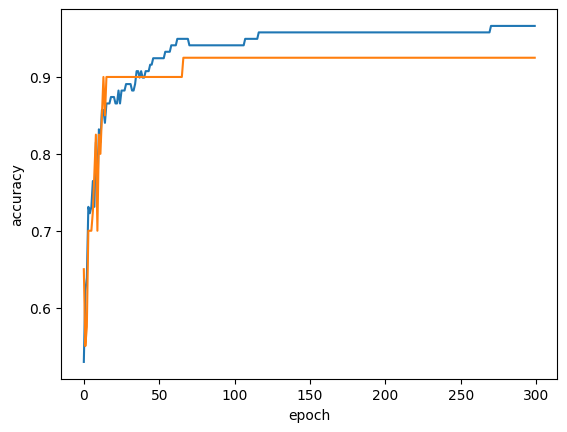

In [19]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [28]:
sc = SGDClassifier(loss ='log', max_iter=1000, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9411764705882353
0.925


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [30]:
sc = SGDClassifier(loss ='log', max_iter=1000, tol=None, random_state=42, verbose=1)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
-- Epoch 335
Norm: 27.22, NNZs: 5, Bias: -34.047785, T: 39865, Avg. loss: 0.019228
Total training time: 0.05 seconds.
-- Epoch 336
Norm: 27.19, NNZs: 5, Bias: -34.014845, T: 39984, Avg. loss: 0.019083
Total training time: 0.05 seconds.
-- Epoch 337
Norm: 27.16, NNZs: 5, Bias: -33.985835, T: 40103, Avg. loss: 0.019199
Total training time: 0.05 seconds.
-- Epoch 338
Norm: 27.14, NNZs: 5, Bias: -33.944294, T: 40222, Avg. loss: 0.019098
Total training time: 0.05 seconds.
-- Epoch 339
Norm: 27.14, NNZs: 5, Bias: -33.896641, T: 40341, Avg. loss: 0.017893
Total training time: 0.05 seconds.
-- Epoch 340
Norm: 27.09, NNZs: 5, Bias: -33.878617, T: 40460, Avg. loss: 0.020284
Total training time: 0.05 seconds.
-- Epoch 341
Norm: 26.87, NNZs: 5, Bias: -34.001275, T: 40579, Avg. loss: 0.015074
Total training time: 0.05 seconds.
-- Epoch 342
Norm: 27.05, NNZs: 5, Bias: -33.806442, T: 40698, Avg. loss: 0.013194
Total training time: 0.05 seconds.
-- Epoch 343
Norm: 2